___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../figures/capa2.png' /></a>
___

# Análise de Correspondência

Resumindo, a análise de correspondência (múltipla) (CA/MCA) é como a análise de componentes principais (PCA), mas para dados categóricos.

O CA pode representar estruturas subjacentes em dados categóricos, representando dados em um espaço euclidiano de baixa dimensão. Isso torna mais fácil para os analistas inspecionar visualmente os dados e detectar padrões rapidamente.

Essencialmente, ele pega múltiplas variáveis categóricas e as transforma em duas variáveis contínuas que tentam representar da melhor maneira possível os dados originais, em termos de sua covariância. Seu objetivo é substituir o conjunto original de variáveis categóricas por um conjunto menor, mantendo o máximo de informações possível. Esta redução de dimensionalidade permite a regularização, quando necessária, e também uma melhor visualização.

O algoritmo de Análise de Correspondência opera da seguinte maneira:

- **Transformação de Dados**: Inicialmente, o algoritmo transforma os dados originais, que podem consistir em tabelas de contingência ou matrizes de frequência, em scores fatoriais. Esses scores são combinações lineares das categorias das variáveis, tanto para as linhas quanto para as colunas.

- **Score Fatorial para Linhas e Colunas**: Os scores fatoriais representam resumidamente as relações entre as categorias das variáveis. Para as linhas, os scores fatoriais capturam a estrutura de similaridade entre as categorias das variáveis na dimensão das linhas; para as colunas, eles fazem o mesmo na dimensão das colunas.

- **Visualização**: Uma vez obtidos os scores fatoriais, é possível plotá-los em mapas. Cada ponto no mapa representa as coordenadas dos escores fatoriais correspondentes a uma combinação específica de categorias. Essa visualização ajuda a identificar padrões, agrupamentos e tendências nos dados.

- **Interpretação**: Ao analisar os mapas de scores fatoriais, os analistas podem interpretar as relações entre as categorias e entender a estrutura subjacente dos dados. Padrões de proximidade no mapa indicam similaridade entre as categorias.

Explicando mais sobre a transformação de dados, a construção de tabelas de contigência é um processo de agregação de dados. 

A estrutura básica de uma tabela de contingência é a seguinte:

|          | Categoria A | Categoria B | ... | Categoria N |
|----------|--------------|--------------|-----|--------------|
| Grupo 1  |   $n_{11}$   |   $n_{12}$   | ... |   $n_{1N}$   |
| Grupo 2  |   $n_{21}$   |   $n_{22}$   | ... |   $n_{2N}$   |
| ...      |      ...     |      ...     | ... |      ...     |
| Grupo M  |   $n_{M1}$   |   $n_{M2}$   | ... |   $n_{MN}$   |


onde:

- Os grupos representam as diferentes categorias de uma variável.
- As categorias representam as diferentes categorias da outra variável.
- Os elementos $n_{ij}$ indicam a contagem de observações que pertencem simultaneamente ao Grupo i e à Categoria j.

## Implementação no Python

Para implementar essa analise no Python, vamos utilizar a biblioteca [Prince](https://maxhalford.github.io/prince/ca/). Essa biblioteca é uma implementação do CA/MCA em Python, que é compatível com o scikit-learn.

Para este tutorial usaremos um conjunto de dados contendo dados sobre uma pesquisa antiga sobre a divisão de tarefas domésticas entre homens e mulheres. O conjunto de dados contém 456 observações e 9 variáveis. As variáveis são:

- **idade**: idade do entrevistado
- **educacao**: nível de educação do entrevistado
- **sexo**: sexo do entrevistado
- **renda**: renda do entrevistado
- **criancas**: número de crianças no agregado familiar
- **religiao**: religião do entrevistado
- **ideologia**: ideologia política do entrevistado
- **trabalho**: status de trabalho do entrevistado
- **tarefas**: divisão de tarefas domésticas entre homens e mulheres

Aqio a gente só vai olhar para a tabela de contingência da divisão de tarefas em que as elas são organizadas conforme sejam realizadas em conjunto ou individualmente (eixo vertical) e se a responsabilidade primária é da esposa ou do marido (eixo horizontal). A análise de correspondência já existe há muitas décadas, assim como o espírito deste exemplo, a julgar pela atribuição de tarefas. **O autor deste tutorial não endossa esses papéis de gênero**.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from adjustText import adjust_text


color='#4e6c50'


In [40]:


housetasks = pd.read_csv('../data/housetasks.csv', index_col=0)

print(housetasks.shape)
housetasks

(13, 4)


,Wife,Alternating,Husband,Jointly
Task,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


In [48]:
ca = prince.CA(n_components=2,
                 n_iter=3,
                copy=True,
                check_input=True,
                engine='sklearn',
                random_state=42,
                #one_hot=True,
                )

ca = ca.fit(housetasks)
#ca.plot_coordinates(housetasks, figsize=(6, 6))
ca

Agora podemos investigar como as as linhas e colunas são relacionadas com as novas variáveis. Para isso, vamos usar o método `row_coordinates` e `column_coordinates` do objeto `ca`:

In [50]:
ca.column_coordinates(housetasks)

,0,1
Wife,-0.837622,-0.365221
Alternating,-0.062185,-0.291594
Husband,1.160918,-0.601920
Jointly,0.149426,1.026579


In [51]:
ca.row_coordinates(housetasks)

,0,1
Task,,
Laundry,-0.991837,-0.495322
Main_meal,-0.875585,-0.490109
Dinner,-0.692574,-0.308104
Breakfast,-0.508600,-0.452804
Tidying,-0.393808,0.434344
Dishes,-0.188964,0.441966
Shopping,-0.117681,0.403317
Official,0.226632,-0.253613
Driving,0.741770,-0.653414


### Biplot

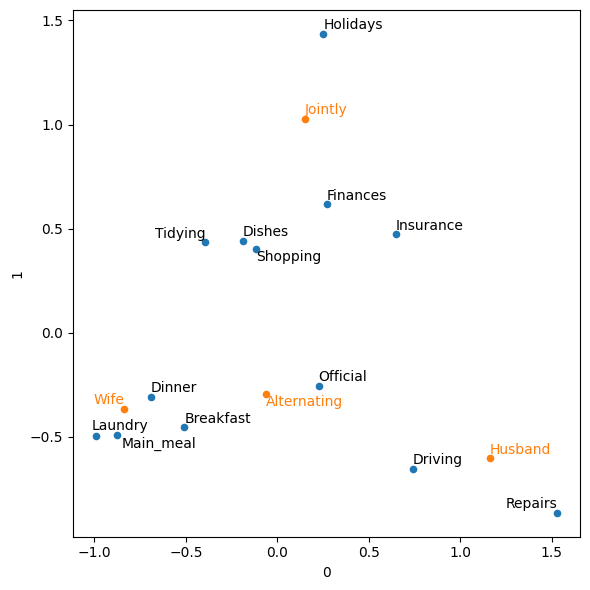

In [49]:
ax = ca.row_coordinates(housetasks).plot.scatter(x=0, y=1, figsize=(6,6))
ca.column_coordinates(housetasks).plot.scatter(x=0, y=1, ax=ax, c='C1')
texts = []
for idx, row in ca.row_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx))
for idx, row in ca.column_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx, color='C1'))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}) 
plt.tight_layout()
plt.show()

No grafico `biplot` para o dataset housetask podemos ter as seguintes informações:

- As tarefas domesticas no lado positivo do eixo horizontal são mais frequentemente realizadas por homens, enquanto as tarefas no lado negativo são mais frequentemente realizadas por mulheres.
- As tarefas domésticas no lado positivo do eixo vertical são mais frequentemente realizadas em conjunto, enquanto as tarefas no lado negativo são mais frequentemente realizadas individualmente.
- As tarefas domésticas no canto superior direito são mais frequentemente realizadas por homens e em conjunto, enquanto as tarefas no canto inferior esquerdo são mais frequentemente realizadas por mulheres e individualmente.

